## Load metasamples and take the Brain one.

In [35]:
import pandas as pd
import os
from os.path import join, basename
import glob
import shutil
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
samples = pd.read_csv("../parameters/samples.tsv", sep="\t", index_col=0)
samples

,Experiment,Full,Name,Tissue
CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001_R1_001.fastq.gz,ATAC,CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001...,BMDM1hKLA_ATAC1,BMDM1hKLA
CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R1_001.fastq.gz,ATAC,CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R...,BMDM1hKLA_ATAC2,BMDM1hKLA
CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_001.fastq.gz,GRO,CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_...,BMDM1hKLA_GRO1,BMDM1hKLA
CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_001.fastq.gz,GROCap,CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_...,BMDM1hKLA_GROCap1,BMDM1hKLA
CHBMDMVehic2_ATAC_JHS999_SD_TGGTCACA_S10_L001_R1_001.fastq.gz,ATAC,CHBMDMVehic2_ATAC_JHS999_SD_TGGTCACA_S10_L001_...,BMDMwt_ATAC1,BMDMwt
...,...,...,...,...
NL5_Liver_S5_L006_R1_001.fastq.gz,RNASeq,NL5_Liver_S5_L006_R1_001.fastq.gz,Liver_RNASeq1,Liver
NL6_Heart_S6_L006_R1_001.fastq.gz,RNASeq,NL6_Heart_S6_L006_R1_001.fastq.gz,Heart_RNASeq1,Heart
NL7_Brain2_S7_L006_R1_001.fastq.gz,RNASeq,NL7_Brain2_S7_L006_R1_001.fastq.gz,Brain_RNASeq2,Brain
NL8_Muscle_S8_L006_R1_001.fastq.gz,RNASeq,NL8_Muscle_S8_L006_R1_001.fastq.gz,Muscle_RNASeq1,Muscle


## Directory names

In [165]:
raw_head_dir = "/media/lewislab/Dropbox (UCSD SBRG)/LewisPub/Data/TSS/"
raw_dir = "/media/lewislab/Dropbox (UCSD SBRG)/LewisPub/Data/TSS/171227_hamster_GRO_mStart"
params_dir = "../parameters"
out_dir = "../Results/csRNA_pipeline/"
bam_dir = join(out_dir, "bam")
sortBam_dir = join(out_dir, "sortBam")
tag_dir = join(out_dir, "tags")
csRNA_dir = join(out_dir, 'csRNA_peaks')

if not os.path.exists(bam_dir):
    os.mkdir(bam_dir)
    
if not os.path.exists(sortBam_dir):
    os.mkdir(sortBam_dir)
    
if not os.path.exists(tag_dir):
    os.mkdir(tag_dir)
    
if not os.path.exists(csRNA_dir):
    os.mkdir(csRNA_dir)

In [161]:
import yaml
parameter_file = "../parameters/params.yaml"
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

print(doc)
gtf = doc["annotation_gtf"]
ref_fa = doc["ref_fa"]

results = doc["results"]


{'data_folder': '/data/isshamie/TSS/NCBI_PICR_103_Processed/', 'results': '/data/isshamie/TSS/Analysis/Analysis_03302020/Results/', 'RNAseq_QC': '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/2017_12_15_hamster_Seq/fastqc/', 'RNAseq_folder': '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/2017_12_15_hamster_Seq/', 'pipeline_path': '/data/isshamie/TSS/Analysis/src/', 'tissues': 'BMDM1hKLA,BMDMwt,Brain,FemaleReproductive,Heart,Kidney,Liver,Lung,MiscOrgans,Muscle,Pancreas,Spleen,CHO', 'ref_fa': '/data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna', 'annotation': '/data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3', 'annotation_gtf': '/data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.gtf', 'mRNA_peak_file': '/data/isshamie/genome/ncbi_anno_103/mRNA_final.peak', 'mRNA_peak_150_file': '/data/isshamie/genome/ncbi_anno_103/mRNA_final_150.peak', 'tss_annotation': '/data/isshamie/genome/ncbi_anno_103/start_site_mRNA_final.tsv',

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


'/data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.gtf'

In [3]:
homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

/data2/resources/software/homer/v4.11_10242019/bin//homer


## BRAIN sample
START1
STARTinput1
RNA-seq: Brain2_S7

## 0.1 Copy raw over to outdir

In [4]:
tissue = "Brain"
csRNA = samples[(samples["Tissue"]==tissue) & (samples["Experiment"]=="START")].iloc[0]
csInput = samples[(samples["Tissue"]==tissue) & (samples["Experiment"]=="STARTinput")].iloc[1]
rnaSeq = samples[(samples["Tissue"]==tissue) & (samples["Experiment"]=="RNASeq")].iloc[0]
print(csRNA.name, "\n", csInput.name,"\n", rnaSeq.name)

CHBrain_mSTART_JHS1057_SD_ATTCCT_S79_L004_R1_001.fastq.gz 
 CHBrain_mSTARTinput_JHS1078_SD_ATTCCT_S100_L005_R1_001.fastq.gz 
 NL11_Brain7-1_S11_L006_R1_001.fastq.gz


In [5]:
def copy_to_outdir(raw_d, raw_name, out_d, out_name ):
    #raw_d = raw_d.replace(" ", "\\").replace("(", "\\").replace(")", "\\")
    raw_d = "/".join(list(map(lambda x: x.replace(" ", "\\ ").replace("(", "\\(").replace(")", "\\)"), raw_d.split("/"))))
    print(raw_d)
    cmd = f'cp {join(raw_d, raw_name)} {join(out_d, out_name+".fastq.gz")}'
    
    
    print(cmd)
    os.system(cmd)
    return

copy_to_outdir(raw_dir, csRNA.name, out_d=out_dir, out_name=csRNA["Name"])
copy_to_outdir(raw_dir, csInput.name, out_d=out_dir, out_name=csInput["Name"])

/media/lewislab/Dropbox\ \(UCSD\ SBRG\)/LewisPub/Data/TSS/171227_hamster_GRO_mStart
cp /media/lewislab/Dropbox\ \(UCSD\ SBRG\)/LewisPub/Data/TSS/171227_hamster_GRO_mStart/CHBrain_mSTART_JHS1057_SD_ATTCCT_S79_L004_R1_001.fastq.gz ../Results/csRNA_pipeline/Brain_START1.fastq.gz
/media/lewislab/Dropbox\ \(UCSD\ SBRG\)/LewisPub/Data/TSS/171227_hamster_GRO_mStart
cp /media/lewislab/Dropbox\ \(UCSD\ SBRG\)/LewisPub/Data/TSS/171227_hamster_GRO_mStart/CHBrain_mSTARTinput_JHS1078_SD_ATTCCT_S100_L005_R1_001.fastq.gz ../Results/csRNA_pipeline/Brain_STARTinput2.fastq.gz


## 1 Trim

In [6]:
def trim(fastq_f):
    cmd = f"homerTools trim -3 AGATCGGAAGAGCACACGTCT -mis 2 -minMatchLength 4 -min 20 {fastq_f}"
    print(cmd)
    os.system(cmd) 
    return

trim(join(out_dir,  csRNA["Name"]+".fastq.gz"))
trim(join(out_dir,  csInput["Name"]+".fastq.gz"))

homerTools trim -3 AGATCGGAAGAGCACACGTCT -mis 2 -minMatchLength 4 -min 20 ../Results/csRNA_pipeline/Brain_START1.fastq.gz
homerTools trim -3 AGATCGGAAGAGCACACGTCT -mis 2 -minMatchLength 4 -min 20 ../Results/csRNA_pipeline/Brain_STARTinput2.fastq.gz


## Build STAR
## Build genome from Homer
## ? Rna-seq 2 should be the one (check annotation?)

In [9]:
# #!which STAR
# thread = 4

# genome_dir = "/data/isshamie/genome/hamster/ncbi_anno_103/GCF_003668045.1_CriGri-PICR"
# db_path = join(genome_dir,"CriGri-PICR_STAR_db")

# if not os.path.exists(db_path):
#     os.mkdir(db_path)
    
# ref_fa = join(genome_dir, "GCF_003668045.1_CriGri-PICR_genomic.fna")
# gtf = join(genome_dir, "GCF_003668045.1_CriGri-PICR_genomic.gtf")


# cmd = f"""STAR --runMode genomeGenerate --genomeDir {db_path} --genomeFastaFiles {ref_fa} --runThreadN {thread} 
#                --limitGenomeGenerateRAM 100000000000  --readFilesCommand zcat 
#                --sjdbGTFfile {gtf} --sjdbOverhang 100"""
# print(cmd.replace("\n",""))
# os.system(cmd)
# #--sjdbGTFtagExonParentTranscript Parent

STAR --runMode genomeGenerate --genomeDir /data/isshamie/genome/hamster/ncbi_anno_103/GCF_003668045.1_CriGri-PICR/CriGri-PICR_STAR_db --genomeFastaFiles /data/isshamie/genome/hamster/ncbi_anno_103/GCF_003668045.1_CriGri-PICR/GCF_003668045.1_CriGri-PICR_genomic.fna --runThreadN 4                --limitGenomeGenerateRAM 100000000000  --readFilesCommand zcat                --sjdbGTFfile /data/isshamie/genome/hamster/ncbi_anno_103/GCF_003668045.1_CriGri-PICR/GCF_003668045.1_CriGri-PICR_genomic.gtf --sjdbOverhang 100


2

## 2. Alignment (STAR)

In [10]:
trim_f = join(out_dir,  csRNA["Name"] + ".fastq.gz.trimmed")
bam_out = join(bam_dir, csRNA["Name"])
db_path = "/data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db"

### csRNA 

In [14]:
cmd = f"STAR --genomeDir {db_path} --runThreadN 24 --readFilesIn {trim_f} --outFileNamePrefix {bam_out} --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000"
print(cmd)
os.system(cmd) 

STAR --genomeDir /data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db --runThreadN 24 --readFilesIn ../Results/csRNA_pipeline/Brain_START1.fastq.gz.trimmed --outFileNamePrefix ../Results/csRNA_pipeline/bam/Brain_START1 --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000


0

### Samtools sort and index 

In [17]:
# cmd = f"samtools sort {bam_out} {csRNA['Name']} + .sorted.bam"
# print(cmd)

cmd = f"samtools index {join(bam_dir,csRNA['Name'])}Aligned.sortedByCoord.out.bam"
print(cmd)
os.system(cmd)

samtools index ../Results/csRNA_pipeline/bam/Brain_START1Aligned.sortedByCoord.out.bam


0

### csInput

In [18]:
trim_f = join(out_dir,  csInput["Name"] + ".fastq.gz.trimmed")
bam_out = join(bam_dir, csInput["Name"])
db_path = "/data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db"
cmd = f"STAR --genomeDir {db_path} --runThreadN 24 --readFilesIn {trim_f} --outFileNamePrefix {bam_out} --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000"
print(cmd)
os.system(cmd) 
cmd = f"samtools index {join(bam_dir,csInput['Name'])}Aligned.sortedByCoord.out.bam"
print(cmd)
os.system(cmd)

STAR --genomeDir /data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db --runThreadN 24 --readFilesIn ../Results/csRNA_pipeline/Brain_STARTinput2.fastq.gz.trimmed --outFileNamePrefix ../Results/csRNA_pipeline/bam/Brain_STARTinput2 --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000
samtools index ../Results/csRNA_pipeline/bam/Brain_STARTinput2Aligned.sortedByCoord.out.bam


0

## 3. make the tags
### Make rna tag directory (normalize by 1m mapped reads not 10m).. thats in findPeaks actually

In [79]:
csRNA_tag = join(tag_dir, csRNA["Name"])
csRNA_bam = join(bam_dir, csRNA["Name"])


cmd = f"makeTagDirectory {csRNA_tag} {csRNA_bam}Aligned.sortedByCoord.out.bam -genome {ref_fa} -single -checkGC -fragLength 150"
print(cmd)
os.system(cmd)

csInput_tag = join(tag_dir, csInput["Name"])
csInput_bam = join(bam_dir, csInput["Name"])

cmd = f"makeTagDirectory {csInput_tag} {csInput_bam}Aligned.sortedByCoord.out.bam -genome {ref_fa}  -single -checkGC -fragLength 150"
print(cmd)
os.system(cmd)

makeTagDirectory ../Results/csRNA_pipeline/tags/Brain_START1 ../Results/csRNA_pipeline/bam/Brain_START1Aligned.sortedByCoord.out.bam -genome /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -single -checkGC -fragLength 150
makeTagDirectory ../Results/csRNA_pipeline/tags/Brain_STARTinput2 ../Results/csRNA_pipeline/bam/Brain_STARTinput2Aligned.sortedByCoord.out.bam -genome /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna  -single -checkGC -fragLength 150


0

### QC tags

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


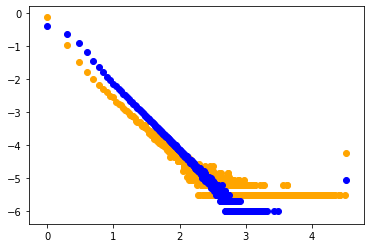

In [80]:
csrna_count = pd.read_csv(join(csRNA_tag, "tagCountDistribution.txt"),sep="\t", index_col=0, dtype=float)
csrna_count["Tag per position"] = csrna_count.index.astype(int)

input_count = pd.read_csv(join(csInput_tag, "tagCountDistribution.txt"),sep="\t", index_col=0)
input_count["Tag per position"] = input_count.index.astype(int)

f = plt.figure()
#plt.scatter(np.log10(input_count.index), np.log10(input_count["Fraction of Positions"]), color="blue")

plt.scatter(np.log10(csrna_count.index),np.log10(csrna_count["Fraction of Positions"]), color="blue")#, loglog=True)
plt.scatter(np.log10(input_count.index), np.log10(input_count["Fraction of Positions"]), color="orange")#, loglog=True)


In [85]:
csrna_length

,Fraction of Tags,Tag per position
Tag Length (Average tag length = 34.865394),,
0.0,0.000000,0
1.0,0.000000,1
2.0,0.000000,2
3.0,0.000000,3
4.0,0.000000,4
...,...,...
71.0,0.000002,71
72.0,0.000002,72
73.0,0.000002,73


Text(0, 0.5, 'Fraction of Tags')

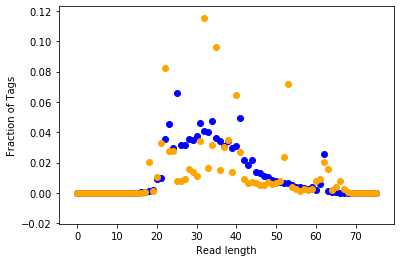

In [95]:
import seaborn as sns
csrna_length = pd.read_csv(join(csRNA_tag, "tagLengthDistribution.txt"),sep="\t", index_col=0, dtype=float)
csrna_length["Read Length"] = csrna_length.index.astype(int)

input_length = pd.read_csv(join(csInput_tag, "tagLengthDistribution.txt"),sep="\t", index_col=0)
input_length["Read Length"] = input_length.index.astype(int)

f = plt.figure()
#plt.scatter(np.log10(input_length.index), np.log10(input_length["Fraction of Positions"]), color="blue")

#sns.distplot(csrna_length["Fraction of Tags"], color="blue")#, loglog=True)
#sns.distplot(input_length["Fraction of Tags"], color="orange")#, loglog=True)
plt.scatter(csrna_length.index,csrna_length["Fraction of Tags"], color="blue")
plt.scatter(input_length.index,input_length["Fraction of Tags"], color="orange")
plt.xlabel("Read length")
plt.ylabel("Fraction of Tags")

## findcsRNA

In [104]:
join(doc["data_folder"],"RNASeq",'Brain')

'/data/isshamie/TSS/NCBI_PICR_103_Processed/RNASeq/Brain'

In [114]:
print(glob.glob(join(doc["data_folder"],"RNAseq",'sortBam',"*.bam")))

['/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL10_Misc_S10_L006_R1_001.fastq.sorted.bam', '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL4_Lung_S4_L006_R1_001.fastq.sort.bam', '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL7_Brain2_S7_L006_R1_001.fastq.sort.bam', '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL6_Heart_S6_L006_R1_001.fastq.sort.bam', '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL10_Misc_S10_L006_R1_001.fastq.sort.bam', '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL3_Spleen_S3_L006_R1_001.fastq.sort.bam', '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL8_Muscle_S8_L006_R1_001.fastq.sort.bam', '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL11_Brain7-1_S11_L006_R1_001.fastq.sort.bam', '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL1_Pancreas_S1_L006_R1_001.fastq.sort.bam', '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/sortBam/NL2_ReproductiveT

In [151]:
name = samples[(samples["Experiment"] == "RNASeq") & (samples["Tissue"] == "Brain")]["Full"]
name = name[0].replace(".fastq.gz","").split("_")[1].split("-")[0]
RNA_tag = glob.glob(join(doc["data_folder"],"RNAseq",'tags',"*"+name+"*"))[0]#name))[0]
RNA_tag

'/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/tags/Brain7'

In [167]:
csInput_tag
csRNA_tag
#rna_files = glob.glob(rna_bam_dir+"/*.bam")
#RNA_tag = 

tis = "Brain"

rnaSeq["Name"].split("_")[1]
out_name = '%s_%s_%s_%s' % (tis,csRNA["Name"].split("_")[1],csInput["Name"].split("_")[1],rnaSeq["Name"].split("_")[1])

out_f = os.path.join(csRNA_dir,out_name)
cmd = f'findcsRNATSS.pl {csRNA_tag} -i {csInput_tag} -rna {RNA_tag} -gtf {gtf} -genome {ref_fa} -cpu 30 -o {out_f}'
print(cmd)
os.system(cmd)

findcsRNATSS.pl ../Results/csRNA_pipeline/tags/Brain_START1 -i ../Results/csRNA_pipeline/tags/Brain_STARTinput2 -rna /data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/tags/Brain7 -gtf /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.gtf -genome /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -cpu 30 -o ../Results/csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq1


2